# <Font color = orange> Earth's Equilibrium Temperature and Climate Forcing </font>

 ## <font color = orange>Rowan Rexrode ||| Tup88296@temple.edu </font>

![image on the web](https://media.istockphoto.com/id/465119999/photo/graphic-illustration-of-the-earth-and-the-sun.jpg?s=612x612&w=0&k=20&c=qeSM-wX5n2zrdnMWadFgMOGdu9hwwegnJD2qpSSRxoQ=)

[Image source](https://www.istockphoto.com/photos/earth-sun)

### Welcome! Here, we will analyze the relationships between shortwave radiation, atmospheric emissivity, albedo, and Earth's surface temperature. We will explore solar activity and the delicate balance of forces that regulate Earth's temperature.

####  Lets import the packages and load in the data we will be using throughout this notebook.</font>

In [2]:
import pandas as pd                          
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib import cm
from matplotlib import colormaps as colormap
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  


In [3]:
ees_climate_dir = 'C:/Users/TU_Climate24_Student/Desktop/ees_climate/'
solar_constant_data = pd.read_csv("https://spot.colorado.edu/~koppg/TSI/Historical_TSI_Reconstruction.txt", skiprows=6, sep=' ').rename(columns={';':'year','Year':'NaN', 'Unnamed: 2':'NaN2', 'Unnamed: 3':'NaN3','TSI':'NaN4', '[W/m^2]':'TSI [W/m^2]'})
nasa_giss_data= pd.read_csv(ees_climate_dir+'unit2_rexrode/data/model_results/NASA_GISS_Response_To_Forcings.csv')
obs_temp=pd.read_csv(ees_climate_dir+'unit2_rexrode/data/model_results/Observed_Temps.csv')



 #### First, we must understand what we are going to be analyzing. Let’s define Total Solar Irradiance (TSI)!
The encyclopedia defines Total Solar Irradiance as “the amount of radiant energy emitted by the Sun over all wavelengths that falls each second on 11 square feet (1 square meter) outside Earth’s atmosphere.”

In simpler terms, it is a measure of the total energy that reaches Earth's atmosphere per unit area, measured in watts per square meter (W/m²). It was once referred to as the solar constant, but despite the implication that it is a fixed value, it is now known to vary over time. </font>
[Link to the source used to learn about TSI](https://earth.gsfc.nasa.gov/climate/projects/solar-irradiance/about)

 Let's get a better understanding of our data. Below we will calculate the mean and the magnitude of TSI found in our solar_constant_data. </font>

In [15]:
TSI_column=solar_constant_data['TSI [W/m^2]']
TSI_mean=TSI_column.mean()
TSI_mean

1360.9803982885085

In [4]:
TSI_magnitude=TSI_column.std()
TSI_magnitude

0.4736141972795096

 Our code produced a mean value of 1360.980 W/m^2 which is the same as the accepted value for the solar constant. It produced a value of 0.4736 W/m^2 for our standard deviation which tells us that TSI usually varies about 0.4736 W/m^2 per year. </font>

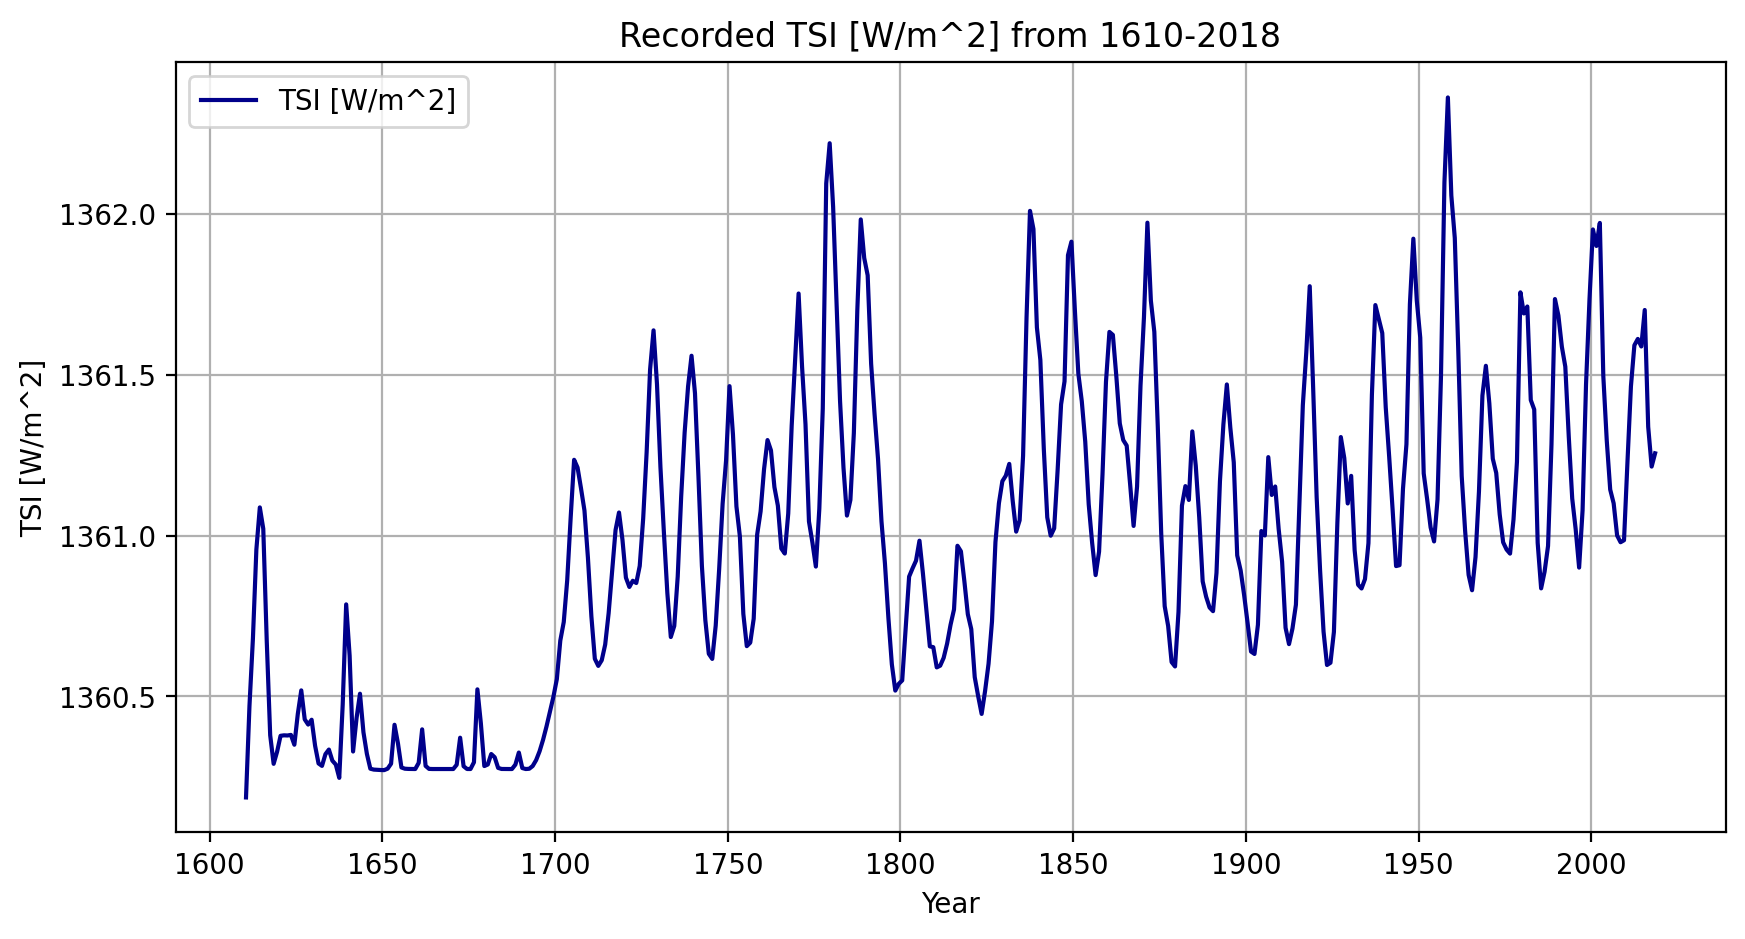

In [4]:
fig, ax= plt.subplots(figsize=(10,5))
ax.plot(solar_constant_data['year'],solar_constant_data['TSI [W/m^2]'],label='TSI [W/m^2]', color='darkblue')
ax.set_title('Recorded TSI [W/m^2] from 1610-2018')
ax.set_xlabel('Year')
ax.set_ylabel('TSI [W/m^2]')
ax.legend()
ax.grid(True) 

 **Figure 1.** TSI [W/m^2] from 1610 to 2018. 

 As we can see from our graph above, total solar irradiance varies greatly with respect to time. Research explains this variation as a result of the dark areas on the sun called <u>sun spots</u> and the bright areas surrounding sun spots called <u>faculae</u>.
[Link to the source used to learn about TSI variability](https://svs.gsfc.nasa.gov/10396/)

Between the years of 1650-1715 there is a recorded drop in TSI [W/m^2] recorded. This period was called the Maunder Minimum, it can be visualized by the graph shown above. Let's calculate what Earth's surface air temperature would have been during this time period and compare it to the temperature dervived from the accepted solar constant value. </font>

In [5]:
#Below the code uses the .loc function to isolate the TSI [W/m^2] values between 1650-1715 in the 'year' column.
TSI_low=solar_constant_data.loc[(solar_constant_data['year']>=1650) & (solar_constant_data['year']<=1715),'TSI [W/m^2]']
TSI_low_mean=TSI_low.mean()
TSI_low_mean


1360.4342584615385

In [6]:
#This code assigns necessary values to variable we will use to calculate Earth's surface temperature. 
earth_rad =  6378137              # Earth's radius in meters
sun_rad = 696000000               # Sun's radius in meters
d_earth =  149600000000           # Distance of the Earth from the Sun in meters
sigma = 5.67e-8                   # Stefan-Boltzman constant W⋅m−2⋅K−4
epsilon = 1                       # Emissivity for a blackbody - unitliess
T_sun =  5778                     # Sun's average surface temperature in Kelvin
alpha= 0.3                        #Earth's albedo

In [12]:
#Calculate the temperature of Earth's surface during the Maunder Minimum
def earth_temp (solar_value):
    temp = (((1-alpha)*solar_value*np.pi*earth_rad**2)/(4*np.pi*earth_rad**2*sigma))**(1/4)
    return temp
T_earth_low = earth_temp(TSI_low_mean)
T_earth_low

254.5558824139783

In [13]:
#Converts the value above from Kelvin to Celcius
def make_celcius (temperature):
    celcius= temperature - 273.15
    return celcius
T_earthlow_C= make_celcius(T_earth_low)
T_earthlow_C

-18.594117586021667

In [16]:
#Calculates the temperature of Earth's surface from the accepted Solar constant value
T_earth = earth_temp(TSI_mean)
T_earth

254.58142612930314

In [17]:
#Converts the value above from Kelvin to Celcius
T_earth_C=make_celcius(T_earth)
T_earth_C

-18.568573870696838

In [16]:
#Calculate the temperature drop
T_earth_C-T_earthlow_C

0.025543715324829463

In [18]:
#Calculate the standard deviation between temperatures in the Maunder Minimum
Maunder_temps=earth_temp(TSI_low)
Maunder_temps_std=Maunder_temps.std()
Maunder_temps_std



0.01217589150794594

In the code above we determined that the average surface air temperature of Earth during the Maunder Minimum was -18.59 degrees celcius and the average temperature dervived from the accepted solar constant was -18.56 degrees celcius. This means there is about a 0.26 degree celcius difference between the two temperature values. 

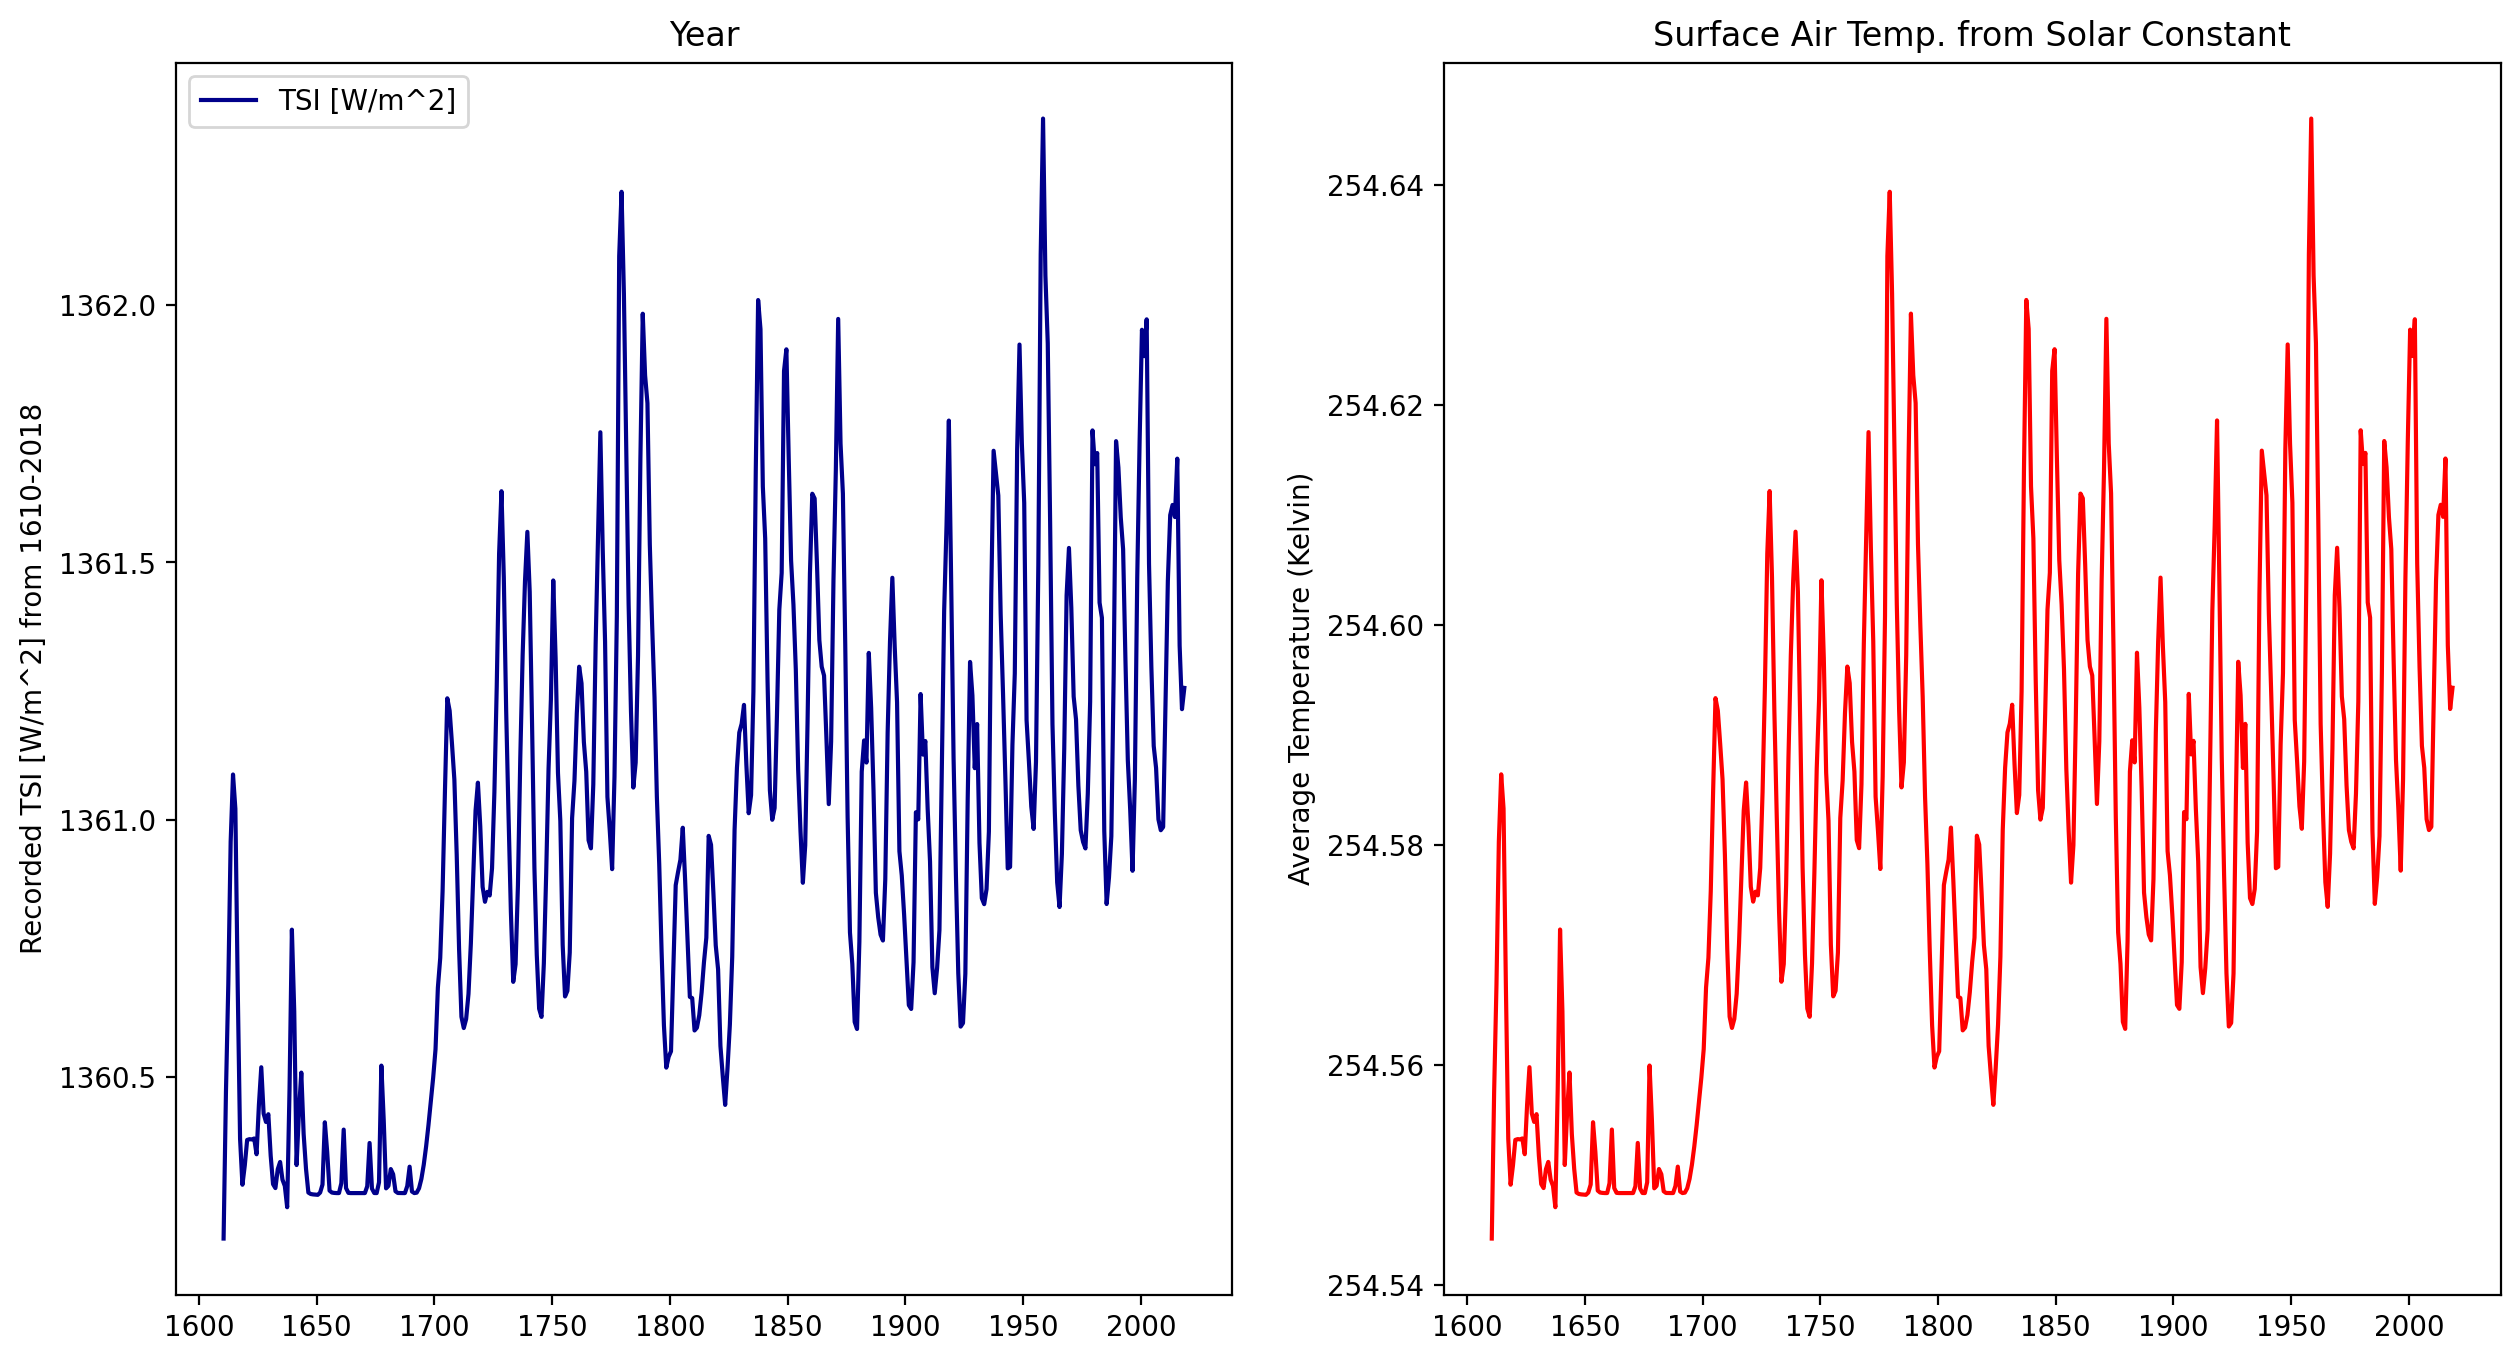

In [44]:
plt.style.use('default')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Plot TSI data
ax1.plot(solar_constant_data['year'], solar_constant_data['TSI [W/m^2]'], label='TSI [W/m^2]', color='darkblue')
ax1.set_ylabel('Recorded TSI [W/m^2] from 1610-2018')
ax1.set_title('Year')
ax1.legend()

# Plot Surface Temperature using the earth_temp function
ax2.plot(solar_constant_data['year'], earth_temp(solar_constant_data['TSI [W/m^2]']), color='red')
ax2.set_ylabel('Average Temperature (Kelvin)')
ax2.set_title('Surface Air Temp. from Solar Constant')

plt.show()


**Figure 2.** Bar graph comparison of the recorded TSI values from 1610-2018 and the average surface air temperature calculated from the corresponding TSI values. 

|Solar Irradiance (Maunder Minimum)(W/m^2)|Temperature Earth (Celcius)
|---|---|
|Mean=1360.4342584615385|Mean=-18.594117586021667|
|Std=0.2603218770173773|Std=0.01217589150794594|

 Now let's explore other uses of our code to learn more about the role of albedo in Earth's climate system.</font>

In [21]:
#This is the formula from above we used to calculate temperature from albedo and TSI. 
##As it is currently it uses the accepted albedo value 0.3 (alpha) as the albedo factor
###Now lets change the albedo to see how temperature changes. 

#Lower albedo
def albedo_temp (albedo):
    albedo_temp=(((1-albedo)*TSI_mean*np.pi*earth_rad**2)/(4*np.pi*earth_rad**2*sigma))**(1/4)
    return albedo_temp

Low_albedo_temps_C=make_celcius(albedo_temp(0.1))

#Higher albedo
High_albedo_temps_C=make_celcius(albedo_temp(0.8))


print("Remember, our original calculated average surface air temperature was",T_earth_C,"with albedo lowered from 0.3 to 0.1 temperature is", Low_albedo_temps_C,"with albedo raised to 0.8 temperature is  ", High_albedo_temps_C,".") 


Remember, our original calculated average surface air temperature was -18.568573870696838 with albedo lowered from 0.3 to 0.1 temperature is -2.0604152226047177 with albedo raised to 0.8 temperature is   -87.02286007336602 .


Now let's explore our equation to understand how an increase or decrease in the emissivity parameter would effect the system.</font>

In [23]:
#The emissivity parameter for a blackbody is 1. It is the 1 in the (1-alpha) part of our code.

#Lower emissivity parameter 
def emiss_temp (emissivity):
    emissivity_temp=(((emissivity-alpha)*TSI_mean*np.pi*earth_rad**2)/(4*np.pi*earth_rad**2*sigma))**(1/4)
    return emissivity_temp
    
Low_emiss_temp_C=make_celcius(emiss_temp(0.6))

#Higher emissivity parameter
High_emiss_temp_C=make_celcius(emiss_temp(2))

print("Remember, our original calculated average surface air temperature was",T_earth_C,"with a lower emissivity parameter temperature is",Low_emiss_temp_C,"with a higher emissivity parameter temperature is",High_emiss_temp_C,".")


Remember, our original calculated average surface air temperature was -18.568573870696838 with a lower emissivity parameter temperature is -67.16645947766233 with a higher emissivity parameter temperature is 44.65771467744514 .


Through our experiments with the formula, we learned that the albedo and emissivity parameters inversely affect Earth's surface temperature. A higher albedo results in a lower temperature, which makes sense because it indicates that more energy is being reflected from Earth. The emissivity parameter for a perfect emitter is 1, while a perfect reflector has an emissivity of 0. When we increased the emissivity, the temperature also increased. It has been found that material properties influence emissivity. For example, tin foil has a lower emissivity than soil. Urbanization, which leads to an increase in concrete and other artificial surfaces, could also contribute to a higher emissivity parameter.

<function matplotlib.pyplot.show(close=None, block=None)>

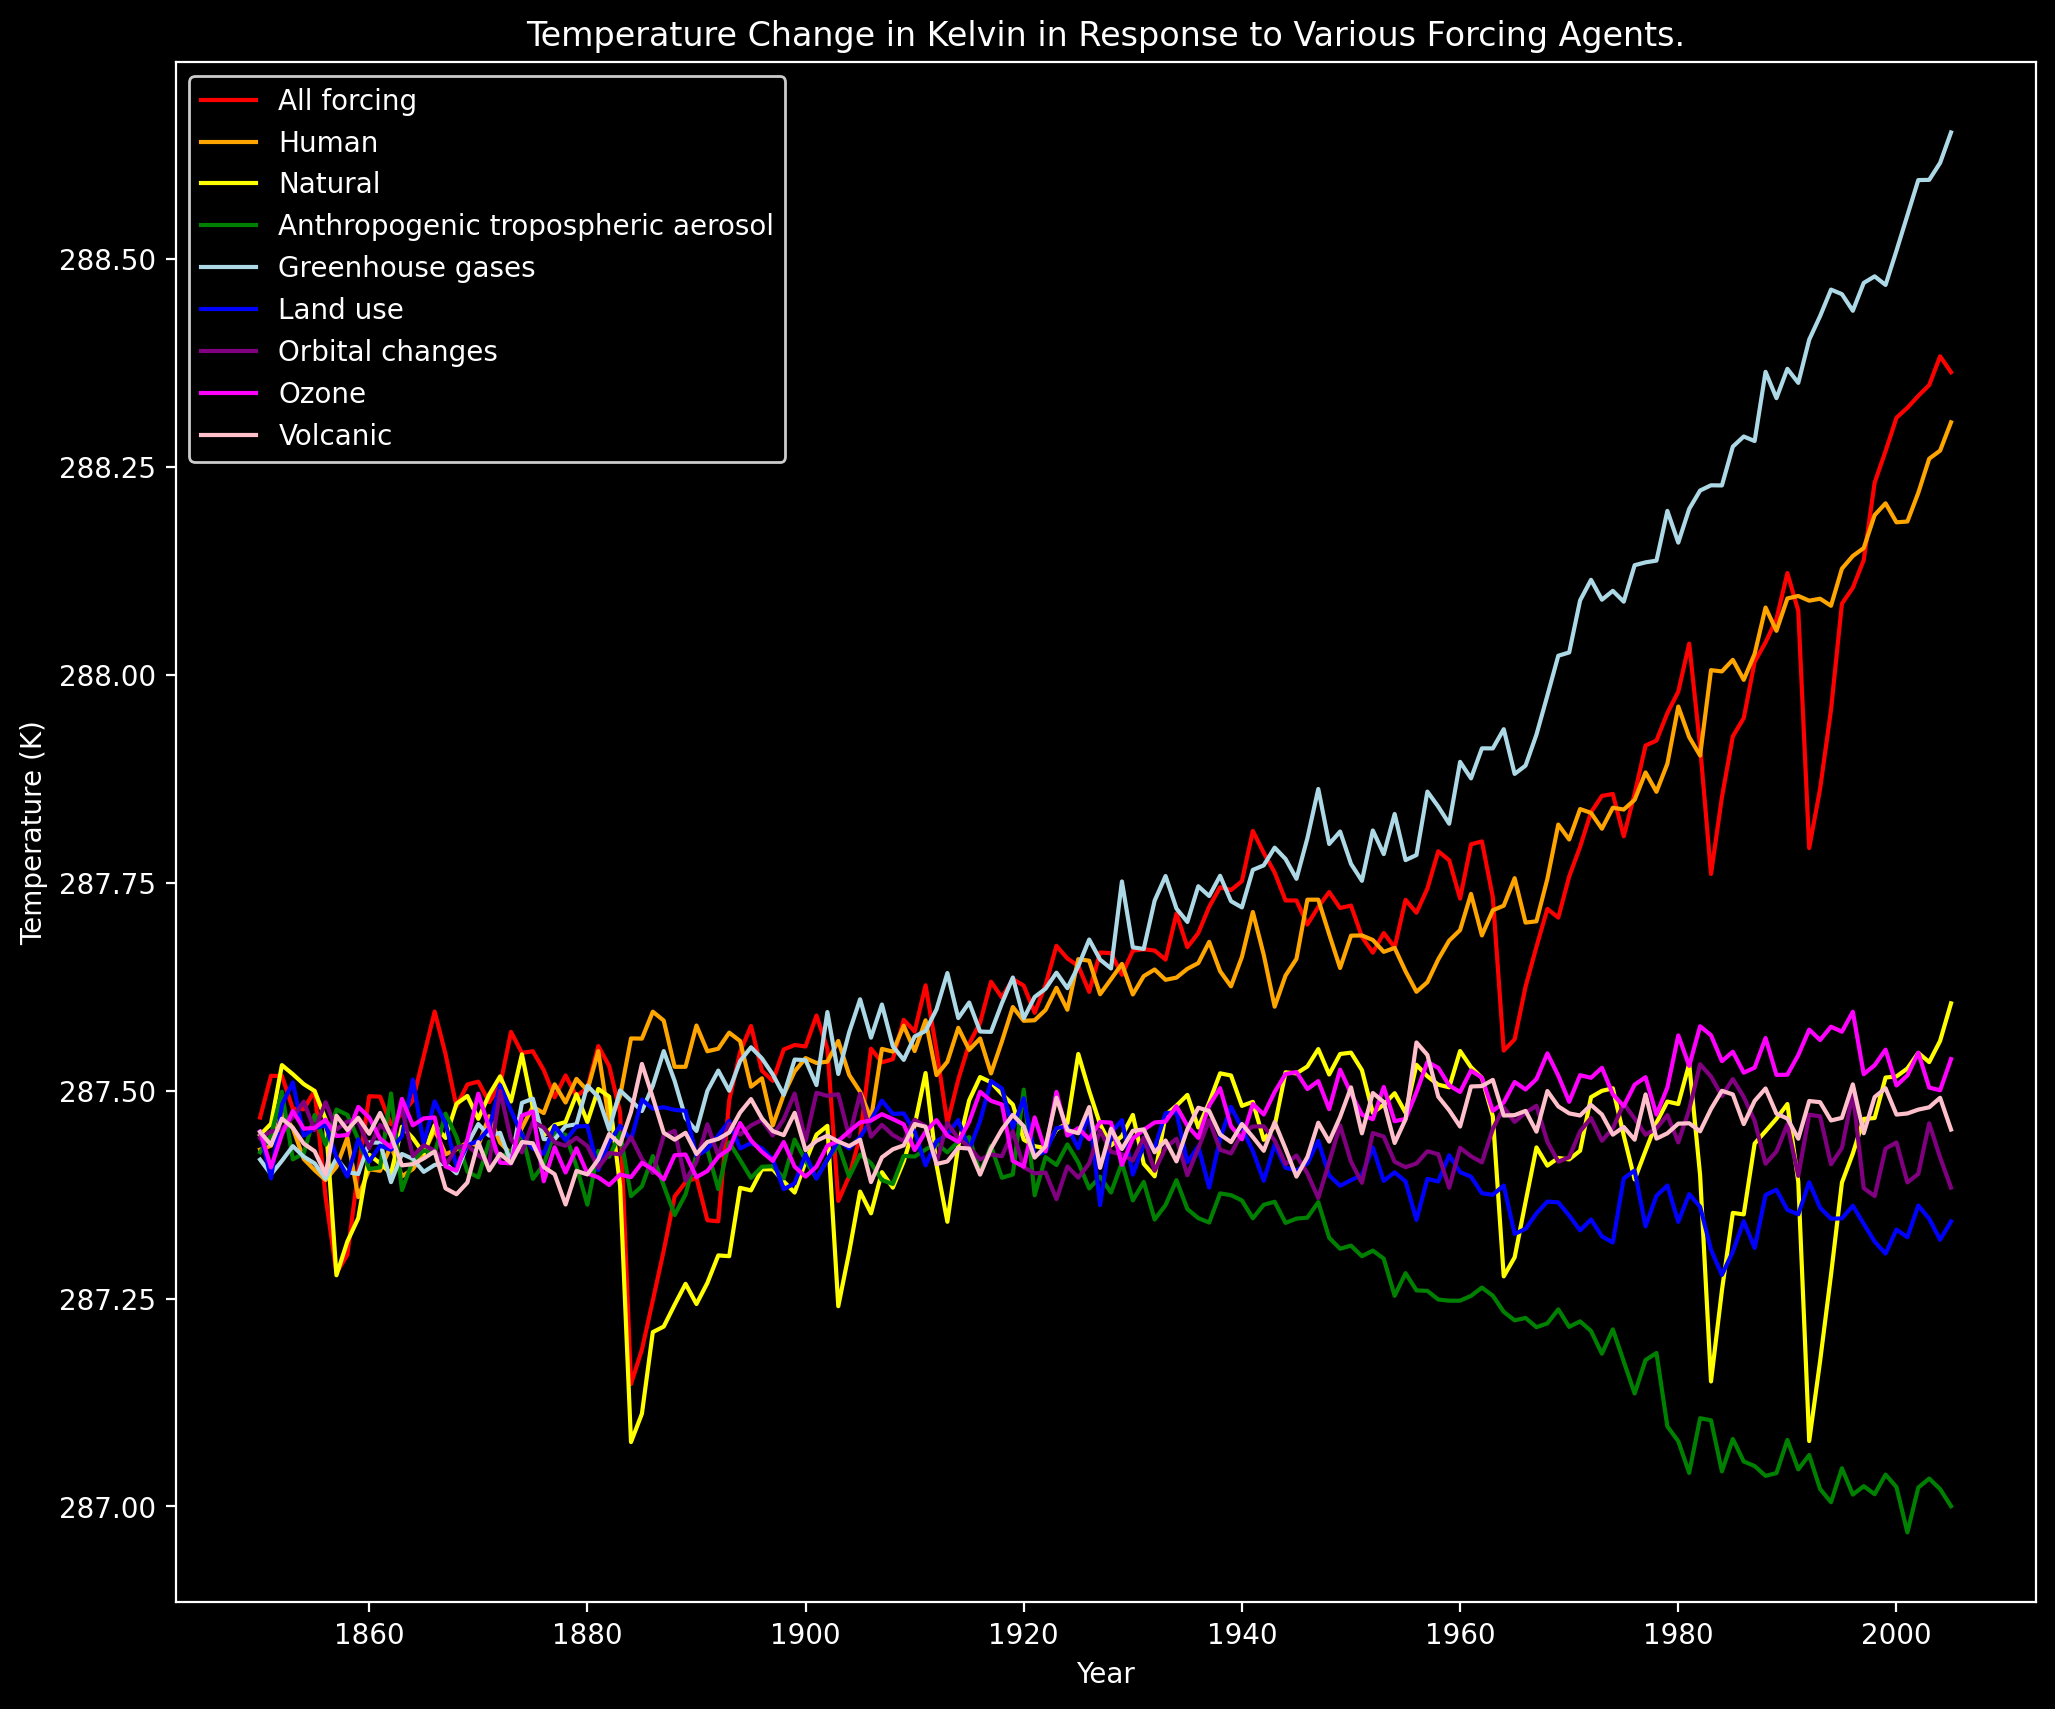

In [32]:
#Call and label the proper columns for use.
All=nasa_giss_data["All forcings"]
Human=nasa_giss_data["Human"]
Natural=nasa_giss_data["Natural"]
Anthro=nasa_giss_data["Anthropogenic tropospheric aerosol"]
Green=nasa_giss_data["Greenhouse gases"]
Land=nasa_giss_data["Land use"]
Orb=nasa_giss_data["Orbital changes"]
Ozone=nasa_giss_data["Ozone"]
Solar=nasa_giss_data["Solar"]
Volcanic=nasa_giss_data["Volcanic"]
Year=nasa_giss_data["Year"]

#Create the figure the graph will go on
fig, ax = plt.subplots(figsize=(12, 10))
plt.style.use('dark_background')

#Plot each line
plt.plot(Year, All, label="All forcing", color='red')
plt.plot(Year, Human, label="Human", color="orange")
plt.plot(Year, Natural, label="Natural", color="yellow")
plt.plot(Year, Anthro, label="Anthropogenic tropospheric aerosol", color="green")
plt.plot(Year, Green, label="Greenhouse gases", color="lightblue")
plt.plot(Year, Land, label="Land use", color="blue")
plt.plot(Year, Orb, label="Orbital changes", color="purple")
plt.plot(Year, Ozone, label="Ozone", color="magenta")
plt.plot(Year, Solar, label="Volcanic", color="pink")

#Labels and legend
plt.xlabel("Year")
plt.ylabel("Temperature (K)")
plt.title("Temperature Change in Kelvin in Response to Various Forcing Agents.")
ax.legend(facecolor='black', edgecolor='white', labelcolor='white')

plt.show

**Figure 3.** Various forcing agents and the corresponding global temperature change as a result of their effect throughout the years.  

The <font color='yellow'>**natural**</font> line shows that it is trending downwards, and this is because the recorded solar and volcanic activity of our time is actually thought to be having a cooling effect on Earth. This is also why the <font color='pink'>**volcanic**</font> line trends flat with some dips. Volcanic activity can increase Earth's albedo through the particulate matter it releases into the atmosphere. As we learned above, increasing Earth's albedo leads to decreased temperatures. <font color='green'>**Anthropogenic tropospheric aerosols**</font> actually reflect incoming solar radiation, once again increasing albedo, thus temperature trends downward with their influence.
<font color='magenta'>**Ozone**</font> changes have caused a very minute increase, thought to be only about a few tenths of a degree. Ozone is a greenhouse gas and leads to gradual warming over time, because it increases Earth's emissivity. Our <font color='blue'>**land use**</font> is thought to have a net cooling effect due to an increase in albedo. A field has a higher reflectivity than a forest, so replacing forests with parking lots or farm fields increases albedo.<font color='orange'> **Human**</font> forcings align with the observed warming of the planet. It is thought that about 103% of warming since 1850 is from humans. It is over a hundred percent because scientists calculate that, naturally, the planet would actually be a bit cooler due to solar and volcanic activity.<font color='lightblue'> **Greenhouse gases**</font> are known to have been increased due to human activity and also lead to warming because of their ability to retain and trap heat. They increase the emissivity factor of Earth, which we learned above means that a higher emissivity leads to higher temperatures. It is clear that the observed warming is a result of human interaction and can be visualized in our graph. If all the natural forcing agents' temperature values were averaged and plotted, it would be a line with a small slope, possibly even a negative slope. However, when you observe the temperature in relation to human forcing agents, the slope steepens drastically in the positive direction.

[Link to the source to learn about forcing agents](https://www.carbonbrief.org/analysis-why-scientists-think-100-of-global-warming-is-due-to-humans/)humans/)


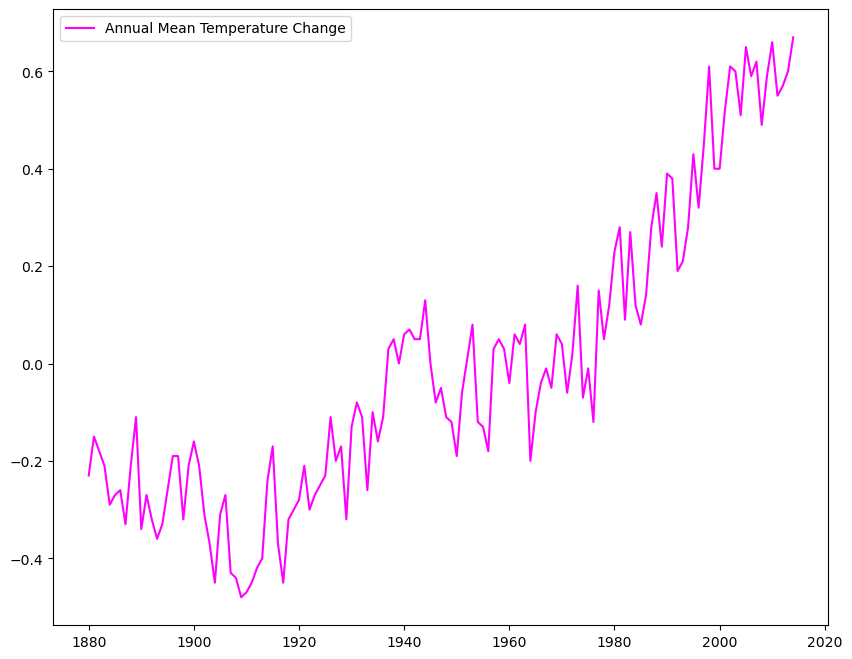

In [55]:
Year=obs_temp["Year"]
Temp=obs_temp["Annual_Mean"]
plt.figure(figsize=(10,8))
plt.plot(Year,Temp, label="Annual Mean Temperature Change", color="magenta")
plt.legend()

plt.show()


**Figure 4.** Average of annual mean temperature increase. 

 If we compare figure 5 to figure 4 we can further see the correlation between annual mean temperature change and human activity on temperature. The lines plotted for both annual mean temperature change and human forcing agents follow this same pattern. Relativly stable til 1940 where there is a jump, the a slight decrease again, and then a dramatic upwards sloping up til the 2020s. 

We learned a lot throughout this notebook! We learned what total solar irradiance is, how it has fluctuated throughout the years, and how it affects temperature. Then we analyzed the Maunder Minimum period to further understand TSI and its effect on temperature. We changed our albedo and emissivity parameters to discover that a higher albedo = lower temperatures, and a higher emissivity = higher temperatures. Next, we examined various forcing agents and their effect on climate. All of this led to the conclusion that human influence has the most significant impact on climate. We further corroborated this through the comparison of temperature change due to human activity with the graph of annual mean temperature change. To some, it may be concerning that human influence has such a massive impact on surface temperatures. However, with that knowledge, we can hopefully change our behavior to mitigate further effects. Thanks for learning with me.
